In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import losses

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
hmf_new = pd.read_csv('data/HMF_theor.csv')
hmf_new = hmf_new.drop(['Unnamed: 0'], axis=1)

dataset = hmf_new.copy()

x = dataset['log_10(mvir)'].values
y = dataset['n(>M)'].values
dataset.head(4)



,log_10(mvir),n(>M)
0,1.000000e+10,0.254378
1,1.122018e+10,0.229857
2,1.258925e+10,0.207706
3,1.412538e+10,0.187695


In [3]:
lcdm = pd.read_csv('data/lcdm_counts.dat')
#df.drop(['B', 'C'], axis=1)
lcdm = lcdm.drop(['Unnamed: 0'], axis = 1)
lcdm.head(4)

,log_10(M200c),counts,n(>M)
0,10.572196,773,0.028888
1,10.877562,717,0.022704
2,11.182927,689,0.016968
3,11.488293,625,0.011456


In [4]:
# simulacion
profile = np.loadtxt('data/mVector_SIMULATION .txt')
xsim = profile[:,0]
ysim = profile[:,8]
max(xsim), min(xsim), max(ysim), min(ysim)

(891250938133889.9, 10000000000.0, 0.25437833031965895, 6.889011444267326e-07)

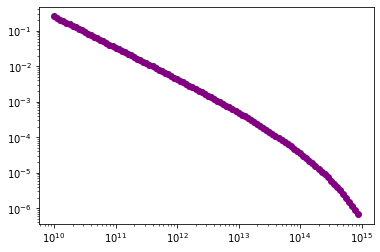

In [5]:
plt.yscale('log')
plt.xscale('log')

plt.scatter(hmf_new['log_10(mvir)'], hmf_new['n(>M)'], c = 'purple')

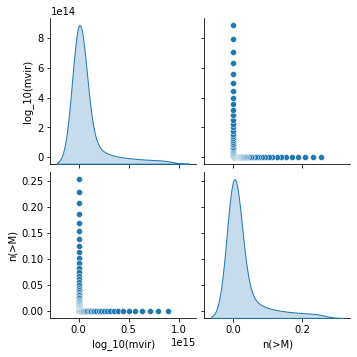

In [6]:
sns.pairplot(dataset, diag_kind="kde")

In [7]:
print(len(dataset.values), np.shape(dataset.values))
randomize = np.random.permutation(len(dataset.values))

X = x[randomize]
Y = y[randomize]

# Define a size for your train set 
split = 0.8
ntrain = int(split * len(X))

indx = [ntrain]
X_train, X_test = np.split(X, indx)
y_train, y_test = np.split(Y, indx)

split = 0.5
ntrain = int(split * len(X_test))
indx = [ntrain]

X_test, X_val = np.split(X_test, indx)
y_test, y_val = np.split(y_test, indx)

100 (100, 2)


In [8]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(10,)
(10,)
(80,)
(80,)


In [9]:
# xscaler = 
minx = np.log(np.min(X))
maxx = np.log(np.max(X))
yscaler = StandardScaler()
xscaler = StandardScaler()
# # fit scaler on data
xscaler.fit(X.reshape(-1,1))
yscaler.fit(Y.reshape(-1,1))

# # apply transform
X_train = xscaler.transform(X_train.reshape(-1,1))
X_val = xscaler.transform(X_val.reshape(-1,1))
X_test = xscaler.transform(X_test.reshape(-1,1))

y_train = yscaler.transform(y_train.reshape(-1,1))
y_val = yscaler.transform(y_val.reshape(-1,1))
y_test = yscaler.transform(y_test.reshape(-1,1))

In [10]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                   min_delta=0.0,
                                   patience=50.0,
                                   restore_best_weights=True)]

In [32]:
def ann_model(ninput=1, n_nodes1=100, n_nodes2=100, n_nodes3=100, dropout=0.5):
    model = models.Sequential()
    model.add(layers.Dense(n_nodes1,activation='selu',input_shape=(ninput,)))
#     model.add(layers.Dropout(dropout))
    model.add(layers.Dense(n_nodes2,activation='selu'))
#     model.add(layers.Dropout(dropout))
    model.add(layers.Dense(n_nodes3,activation='selu'))
#     model.add(layers.Dense(n_nodes3,activation='relu'))
#     model.add(layers.Dense(n_nodes3,activation='relu'))
#     model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, activation='linear'))

    model.compile(optimizer=optimizers.RMSprop(lr=1e-2),#.Adam(lr=1e-4),
                  loss='mse')


#     test1_model.summary()
    return model

In [33]:
dropout = 0.01
n_nodes1 = 100
n_nodes2 = 100
n_nodes3 = 200

In [34]:
neural_model = ann_model(n_nodes1=n_nodes1, n_nodes2=n_nodes2, n_nodes3=n_nodes3,
                        dropout=dropout)

estop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                         patience=100, 
                                         restore_best_weights=True)

lrdecay = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                               patience=2)
callbacks = [estop, lrdecay]

neural_model_history = neural_model.fit(X_train,
                                        y_train,
                                        epochs=100,
                                        batch_size=1,
                                        validation_data=(X_val,y_val),
                                        verbose=1)#, #callbacks=callbacks)



/home/isidro/.local/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 8.0916 - val_loss: 3.1554
Epoch 2/100
80/80 [==============================] - 0s 896us/step - loss: 3.5696 - val_loss: 0.4328
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 2.8635 - val_loss: 0.4498
Epoch 4/100
80/80 [==============================] - 0s 898us/step - loss: 1.4293 - val_loss: 0.5080
Epoch 5/100
80/80 [==============================] - 0s 996us/step - loss: 1.5488 - val_loss: 0.4237
Epoch 6/100
80/80 [==============================] - 0s 944us/step - loss: 1.3161 - val_loss: 0.5126
Epoch 7/100
80/80 [==============================] - 0s 923us/step - loss: 2.7917 - val_loss: 0.5009
Epoch 8/100
80/80 [==============================] - 0s 896us/step - loss: 1.3531 - val_loss: 0.6400
Epoch 9/100
80/80 [==============================] - 0s 893us/step - loss: 1.5588 - val_loss: 0.4531
Epoch 10/100
80/80 [==============================] - 0s 1ms/step - loss: 1.5701 - val_loss: 0.

80/80 [==============================] - 0s 868us/step - loss: 1.4093 - val_loss: 2.4422
Epoch 82/100
80/80 [==============================] - 0s 959us/step - loss: 1.6083 - val_loss: 0.4862
Epoch 83/100
80/80 [==============================] - 0s 940us/step - loss: 1.5392 - val_loss: 0.6216
Epoch 84/100
80/80 [==============================] - 0s 981us/step - loss: 1.3599 - val_loss: 0.4657
Epoch 85/100
80/80 [==============================] - 0s 917us/step - loss: 1.6507 - val_loss: 0.4684
Epoch 86/100
80/80 [==============================] - 0s 913us/step - loss: 1.9500 - val_loss: 0.4176
Epoch 87/100
80/80 [==============================] - 0s 934us/step - loss: 1.4339 - val_loss: 0.6369
Epoch 88/100
80/80 [==============================] - 0s 825us/step - loss: 3.5066 - val_loss: 0.4308
Epoch 89/100
80/80 [==============================] - 0s 828us/step - loss: 1.3203 - val_loss: 1.1638
Epoch 90/100
80/80 [==============================] - 0s 835us/step - loss: 1.3739 - val_loss: 

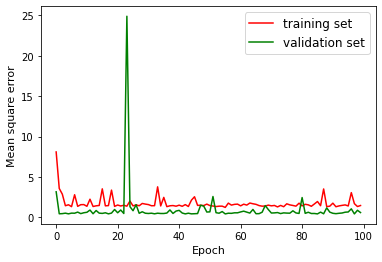

In [35]:
plt.plot(neural_model_history.history['loss'], color='r', )
plt.plot(neural_model_history.history['val_loss'], color='g')


plt.ylabel('Mean square error', fontsize=11)
plt.xlabel('Epoch', fontsize=11)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)

In [36]:
# ypred2 = neural_model.predict(X_test)
#####
# print('Traning and Testing on raw data, all features \n');
#### Model accuracy

# print("Accuracy:", metrics.accuracy_score(y_test, ypred2))

In [37]:
#zor and yor are the original velues for z and [Hz, err]
# x_test_or = xscaler.inverse_transform(X_test)
# yor = yscaler.inverse_transform(ypred2.reshape(-1,1))
# yor = ypred2

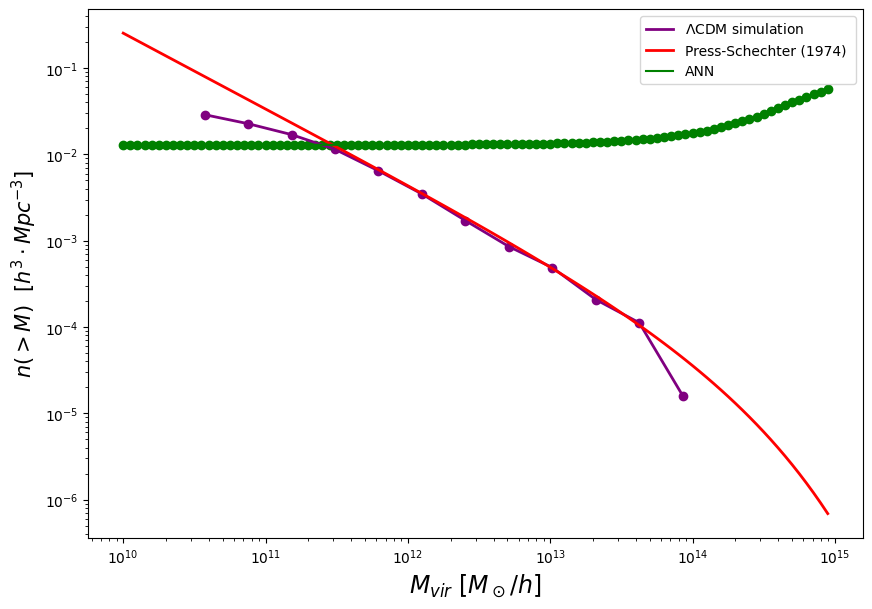

In [38]:
plt.figure(figsize=(10, 7), dpi=100)

plt.yscale('log')
plt.xscale('log')

# LCDM
plt.scatter(10**lcdm['log_10(M200c)'], lcdm['n(>M)'], c = 'purple')
plt.plot(10**lcdm['log_10(M200c)'], lcdm['n(>M)'], c = 'purple', linewidth=2, label='$\Lambda$CDM simulation')

# Simulacion
plt.plot(xsim, ysim, 'r',label='Press-Schechter (1974) ',linewidth=2)

# ANN
pred = neural_model.predict(xscaler.transform(xsim.reshape(-1,1)))
y_predictions = yscaler.inverse_transform(pred.reshape(-1,1))
plt.scatter(xsim,y_predictions, c='green')
plt.plot(xsim,y_predictions, c='green', label='ANN')

plt.xlabel('$M_{vir}$ $[M_\odot/h]$',fontsize=17)
plt.ylabel('$n(>M)$  $[h^3 \cdot Mpc^{-3}]$',fontsize=15,)

plt.legend()
# plt.xlim([3.e10,2.e14])
# plt.ylim([1.e-6,1.e-1])